In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from uncertainties import ufloat
from uncertainties import unumpy
import scipy.misc

In [51]:
def model(x, m, b):
    return m * x + b

def get_x_int(m, b):
    return -b / m

def d2a(d):
    return np.pi * (d / 2) ** 2

def d2l(d):
    return np.pi * d

def uflout_set_uncertainty(data, err):
    uflout_data = []
    for pt in data:
        uflout_data.append(ufloat(pt, err))
    return np.array(uflout_data)

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF


In [35]:
d2a(ufloat(3.25,.01))

8.295768100885548+/-0.05105088062083414

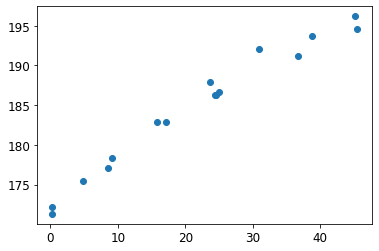

In [23]:
temp_c = np.array([24.5 ,0.3 ,45.4 ,36.7 ,25.0 ,17.2, 8.5, 24.4, 9.2, 45.2, 38.8, 30.9, 23.6, 15.8, 4.9, 0.3])
temp_k = temp_c + 273.15
mm_in_tu = uflout_set_uncertainty(np.array([30, 12, 40, 36, 30.5, 26, 19, 30 , 20.5, 42, 39, 37, 32, 26, 17, 13]), .5)
vol_pm = (d2a(ufloat(.315, .005)) * (ufloat(68.3, .3) + d2l(ufloat(4.7,.1))/2)) + (d2a(ufloat(4.52, .01)) * ufloat(10,.2)) + d2a(ufloat(3.25,.01)) * mm_in_tu / 10 
vol = unumpy.nominal_values(vol_pm)
volerr = unumpy.std_devs(vol_pm)

plt.scatter(temp_c, vol)

In [25]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(model, temp_c, vol, sigma=volerr, absolute_sigma=True, p0=init_params)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

mpm = ufloat(m, dm)
bpm = ufloat(b, db)

In [58]:
bpm

173.14927639548387+/-1.5099280772045174

In [26]:
get_x_int(mpm, bpm)

-328.86135207395745+/-36.07782248444204

In [53]:
red_chi_2(model(temp_c, m, b), vol, volerr, len(vol) - 2)

0.1907624655168665

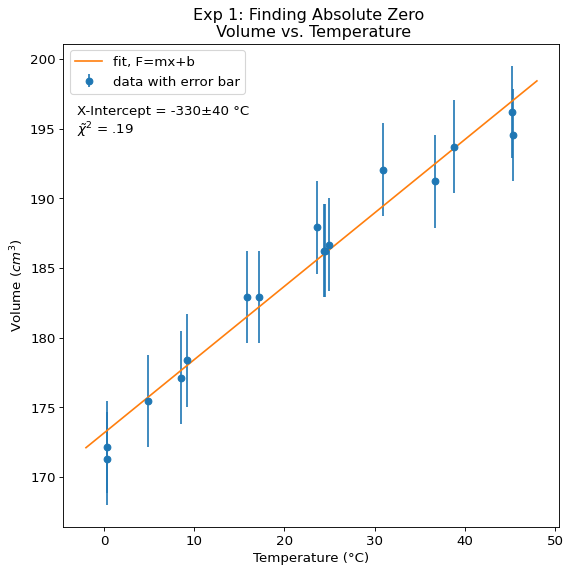

In [56]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(temp_c, vol, yerr=volerr, fmt='o', label="data with error bar")
x_space = np.linspace(-2,48)
plt.plot(x_space, model(x_space, m, b), label='fit, F=mx+b', color='tab:orange')

plt.title("Exp 1: Finding Absolute Zero \n Volume vs. Temperature")
plt.ylabel(r"Volume ($cm^3$)")
plt.xlabel("Temperature (°C)")

plt.text(-3, 196, "X-Intercept = -330±40 °C")
plt.text(-3,194.6, r"$\tilde{\chi}^2$ = .19")
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()

In [59]:
24.2/45

0.5377777777777778

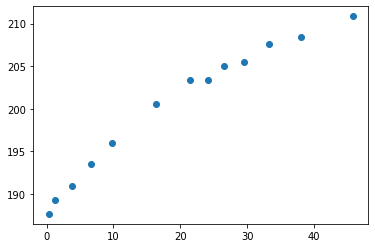

In [4]:
temp_c = np.array([24.2, 45.8, 29.5, 38.0, 33.3, 26.5, 21.5, 16.3, 9.8, 6.7, 3.8, 1.2, 0.3])
temp_k = temp_c + 273.15
mm_in_tu = np.array([45, 54, 47.5, 51, 50, 47, 45, 41.5, 36, 33, 30, 28, 26])
volerr = np.full((len(mm_in_tu)), 2)
vol = 5.61 + 160.46 + d2a(3.25) * mm_in_tu / 10 

plt.scatter(temp_c, vol)

In [5]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(model, temp_c, vol, sigma=volerr, absolute_sigma=True, p0=init_params)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

mpm = ufloat(m, dm)
bpm = ufloat(b, db)

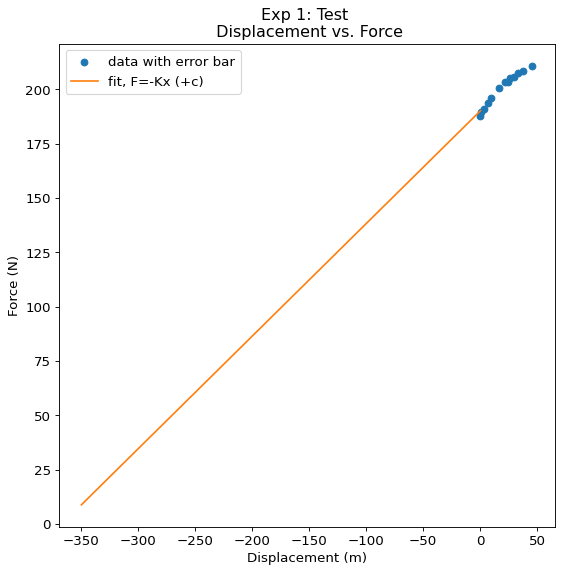

In [6]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(temp_c, vol, label="data with error bar")
x_space = np.linspace(-350,temp_c[-1])
plt.plot(x_space, model(x_space, m, b), label='fit, F=-Kx (+c)', color='tab:orange')

plt.title("Exp 1: Test \n Displacement vs. Force")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()

In [7]:
get_x_int(mpm, bpm)

-366.9557349487079+/-27.781696026566678